In [1]:
import sys
from pathlib import Path
prediction_mode_path = Path("../module")
sys.path.append(prediction_mode_path.as_posix())
import predictions_v05 as pred_mode

import pandas as pd
import numpy as np

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import joblib

import warnings
warnings.filterwarnings('ignore')

### model_type ==
#### RandomForestRegressor

#### DecisionTreeRegressor

#### KNeighborsRegressor

#### SVR

#### linear_model

In [2]:
molecular_descriptors_df = pred_mode.prepare_data('../Data/initial_caffeine.xlsx')

100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [00:02<00:00, 25.41it/s]


Data size (rows, columns): (58, 1613)
Data size after first reduction (rows, columns): (58, 1388)
Data size after second reduction (rows, columns): (58, 1137)


In [3]:
without_standarization, train_r2_, test_r2_, hist1, hist2 = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df, 
                                                                                                    correlation_threshold=0.39, 
                                                                                                    standarization=False, 
                                                                                                    model_type='RandomForestRegressor',
                                                                                                    n_estimators_=12,
                                                                                                    train_test_split_=False, 
                                                                                                    verbose=True)

I am not doing standarization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z    0.087615
1                  AATS0are    0.342320
2                    AATS0d    0.109619
3                   AATS0dv    0.266240
4                    AATS0i    0.017757
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z    0.087615                    0.087615
1                  AATS0are    0.342320                    0.342320
2                    AATS0d    0.109619                    0.109619
3                   AATS0dv    0.266240                    0.266240
4                    AATS0i    0.017757                    0.017757
    molecular descriptor name  corr_value  absolute correlation value
30                     AATS2s    0.407553                    0.407553
74         

In [4]:
without_standarization.predict(molecular_descriptors_df[hist2['molecular descriptor name']])

array([14.16666667, 36.91666667, 60.16666667, 17.66666667, 19.41666667,
        9.75      ,  8.16666667,  8.91666667, 14.25      , 61.66666667,
       75.41666667, 57.33333333, 63.75      , 40.83333333, 22.91666667,
       49.66666667, 33.16666667,  4.16666667,  9.16666667,  2.08333333,
        8.33333333, 15.83333333, 12.16666667,  4.75      ,  6.33333333,
       10.66666667, 11.        , 45.83333333, 59.16666667, 39.16666667,
       46.66666667, 67.5       , 63.33333333, 44.16666667, 53.25      ,
       46.33333333, 62.5       , 75.41666667, 71.25      , 63.75      ,
       70.41666667, 57.08333333, 61.25      , 17.08333333, 29.41666667,
       27.33333333, 40.        , 34.16666667, 28.25      , 26.66666667,
       16.66666667, 29.25      , 34.66666667, 34.91666667, 20.91666667,
       28.5       , 30.5       , 28.25      ])

In [5]:
xs = r2_score(without_standarization.predict(molecular_descriptors_df[hist2['molecular descriptor name']]), molecular_descriptors_df['Aktywność cytoprotekcyjna [%]'])

In [6]:
xs

0.7400230478555667

In [7]:
np.sqrt(xs)

0.8602459228938936

Target distribution histogram: 
AxesSubplot(0.125,0.11;0.775x0.77)


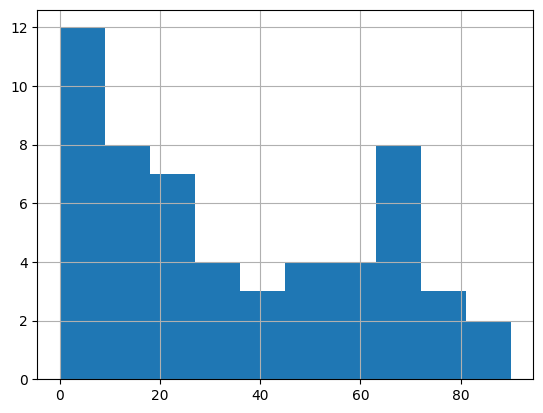

In [8]:
print('Target distribution histogram: ')
print(hist1['Aktywność cytoprotekcyjna [%]'].hist())

In [9]:
print("Number of features (molecular descriptors used): "+ str(len(hist2)))

Number of features (molecular descriptors used): 23


In [10]:
hist2

,molecular descriptor name,corr_value,absolute correlation value
30,AATS2s,0.407553,0.407553
74,AATS6s,0.427231,0.427231
89,AATSC0are,0.390300,0.390300
100,AATSC1Z,-0.435685,0.435685
106,AATSC1m,-0.428122,0.428122
121,AATSC2s,0.395319,0.395319
145,AATSC4s,-0.431682,0.431682
354,ATSC4are,-0.410892,0.410892
361,ATSC4pe,-0.393235,0.393235
362,ATSC4s,-0.482595,0.482595


In [11]:
with_standarization, train_r2__, test_r2__, hist1_, hist2_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df, 
                                                                                                    correlation_threshold=0.39, 
                                                                                                    standarization=True, 
                                                                                                    model_type='RandomForestRegressor',
                                                                                                    n_estimators_=12,
                                                                                                    train_test_split_=False, 
                                                                                                    verbose=True)

I am doing standarization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z    0.087615
1                  AATS0are    0.342320
2                    AATS0d    0.109619
3                   AATS0dv    0.266240
4                    AATS0i    0.017757
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z    0.087615                    0.087615
1                  AATS0are    0.342320                    0.342320
2                    AATS0d    0.109619                    0.109619
3                   AATS0dv    0.266240                    0.266240
4                    AATS0i    0.017757                    0.017757
    molecular descriptor name  corr_value  absolute correlation value
30                     AATS2s    0.407553                    0.407553
74             

In [12]:
with_standarization.predict(molecular_descriptors_df[hist2_['molecular descriptor name']])

array([33.5       , 34.33333333, 34.33333333, 32.66666667, 34.58333333,
       40.5       , 39.66666667, 41.5       , 40.5       , 40.5       ,
       34.33333333, 34.58333333, 40.91666667, 41.33333333, 41.33333333,
       33.5       , 41.33333333, 40.5       , 41.33333333, 41.33333333,
       40.5       , 40.91666667, 40.08333333, 33.58333333, 33.58333333,
       40.5       , 40.5       , 36.16666667, 35.33333333, 35.33333333,
       35.33333333, 35.33333333, 35.33333333, 36.16666667, 36.08333333,
       36.08333333, 36.08333333, 35.33333333, 35.33333333, 38.33333333,
       38.75      , 35.        , 35.41666667, 35.25      , 33.75      ,
       36.08333333, 34.41666667, 42.        , 42.        , 42.        ,
       42.        , 33.5       , 34.25      , 40.33333333, 41.33333333,
       34.25      , 34.25      , 34.25      ])

In [13]:
xs = r2_score(with_standarization.predict(molecular_descriptors_df[hist2_['molecular descriptor name']]), molecular_descriptors_df['Aktywność cytoprotekcyjna [%]'])

In [14]:
xs

-82.2936440119831

# Search inside correlation space - selected test data

In [15]:
step = 0.01
initial_step = 0.3
last_step = 0.48
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
n_estimators = [range(2,21,1)]
corr_th = []
second_list = []
third_list = []
f_list = []
fif_list = []
for i in first_list:
    
    for estimator in n_estimators[0]:
        
        without_standarization, train_r2, test_r2, _, h_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df, 
                                                                                                    correlation_threshold=i, 
                                                                                                    standarization=False, 
                                                                                                    model_type='RandomForestRegressor',
                                                                                                    n_estimators_=estimator,
                                                                                                    train_test_split_=False, 
                                                                                                    verbose=False)
        corr_th.append(i)
        second_list.append(train_r2)
        third_list.append(test_r2)
        f_list.append(len(h_))
        fif_list.append(estimator)


In [16]:
df_without_standarization = pd.DataFrame(data=corr_th, columns=["Correlation threshold"])

In [17]:
df_without_standarization['Training data R^2 score'] = second_list
df_without_standarization['Test data R^2 score'] = third_list
df_without_standarization['Number of features'] = f_list
df_without_standarization['Number of estimators'] = fif_list

In [18]:
df_without_standarization.head()

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,Number of estimators
0,0.3,0.795000,-4.617761,87,2
1,0.3,0.795257,-8.207172,87,3
2,0.3,0.814950,-14.966948,87,4
3,0.3,0.790983,-26.122583,87,5
4,0.3,0.828025,-27.366276,87,6


## Plots

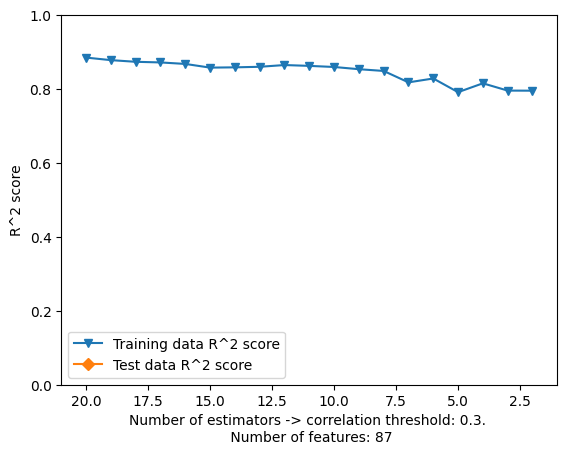

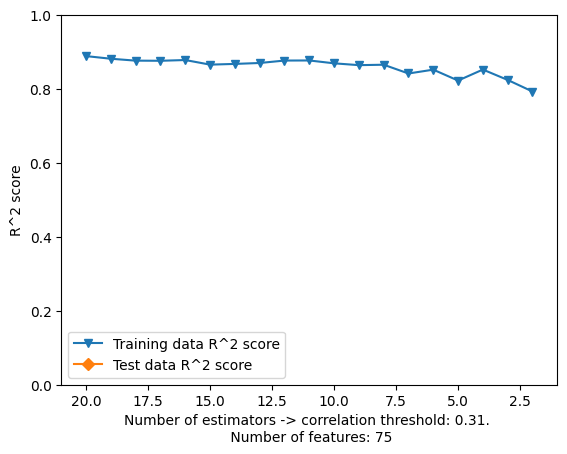

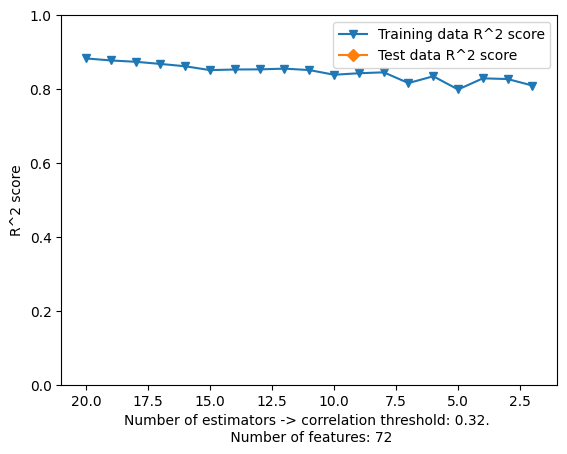

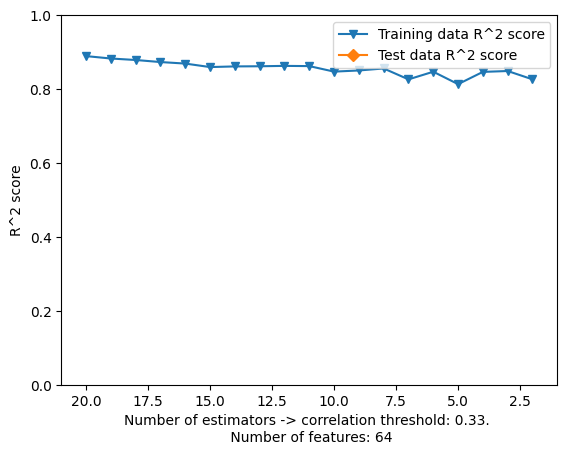

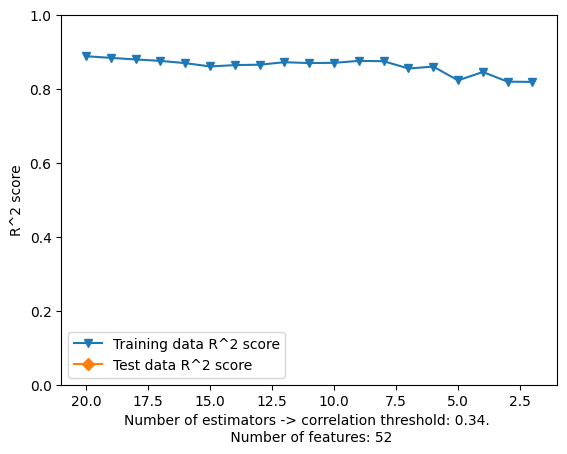

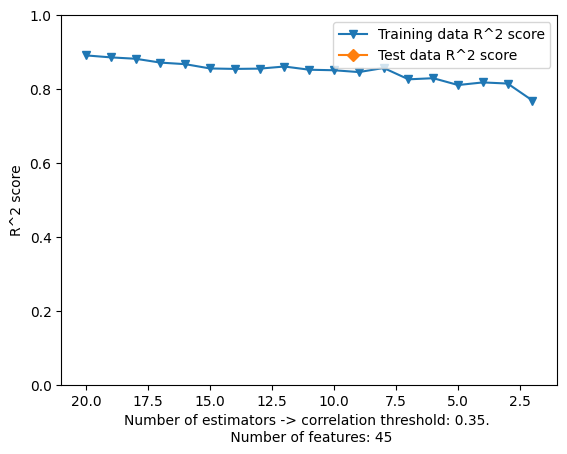

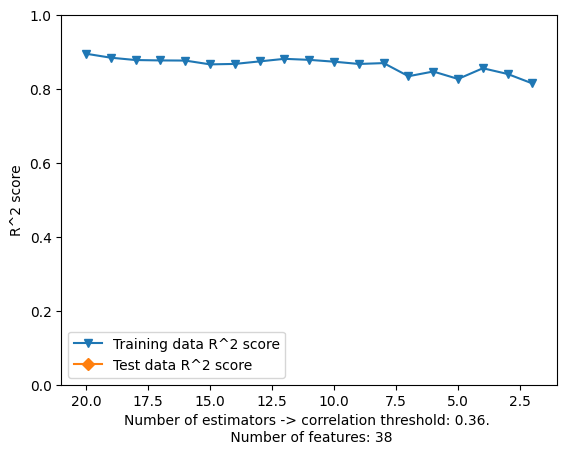

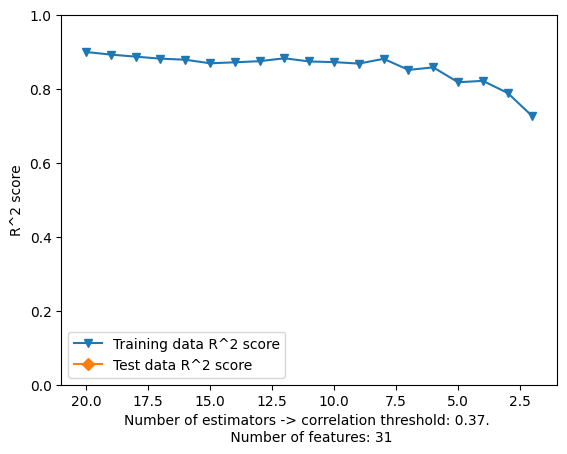

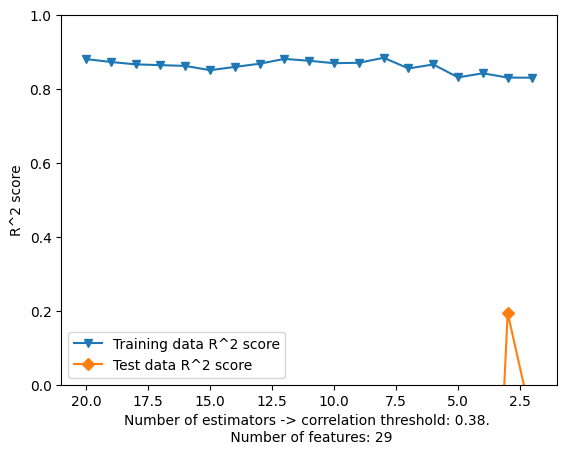

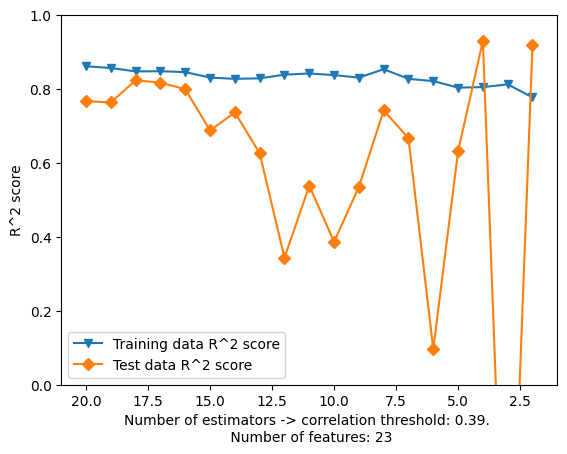

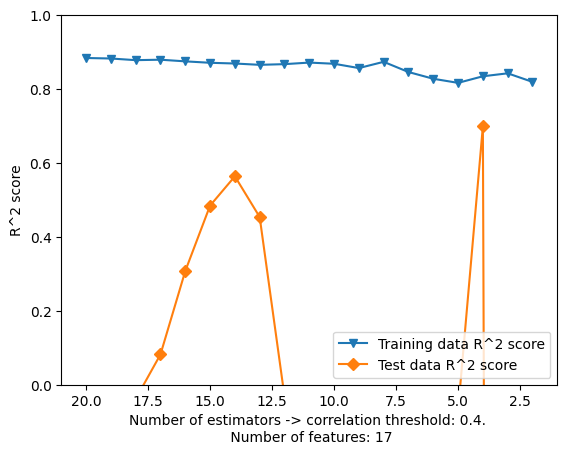

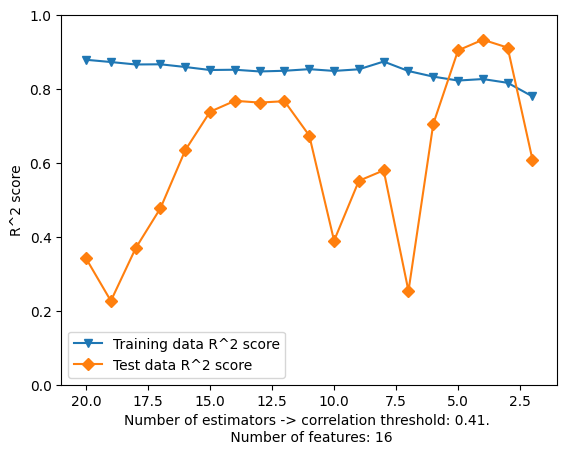

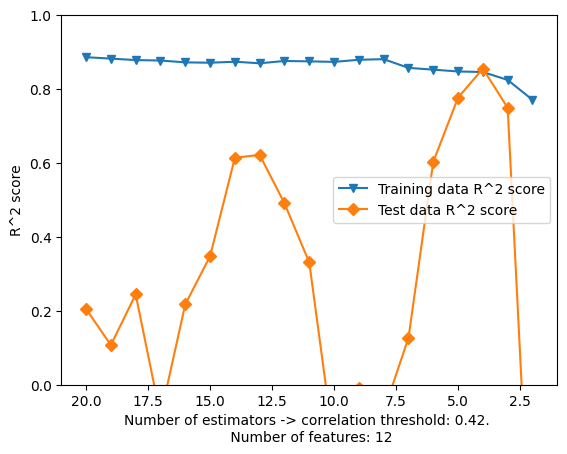

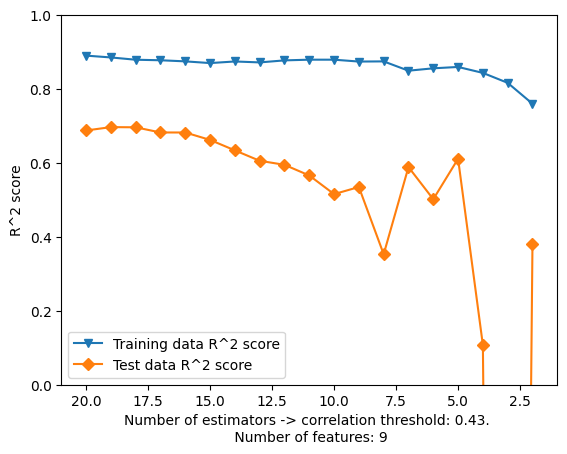

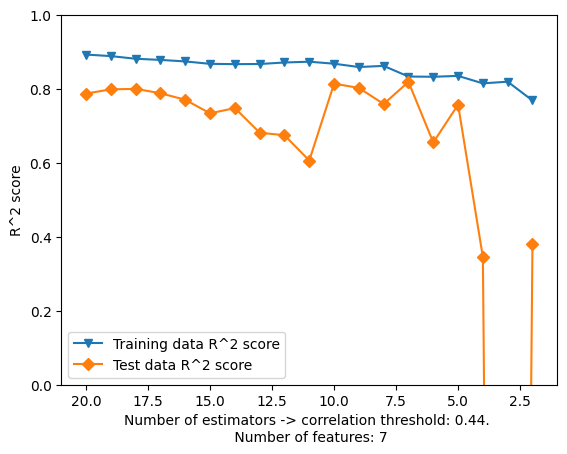

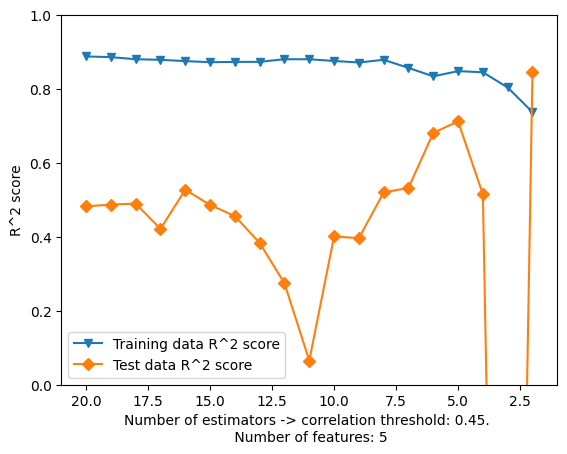

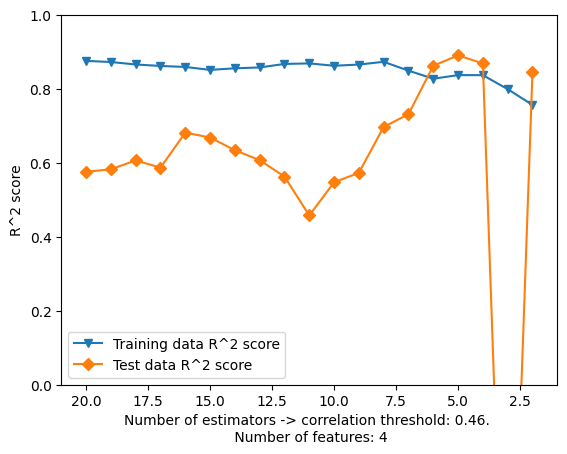

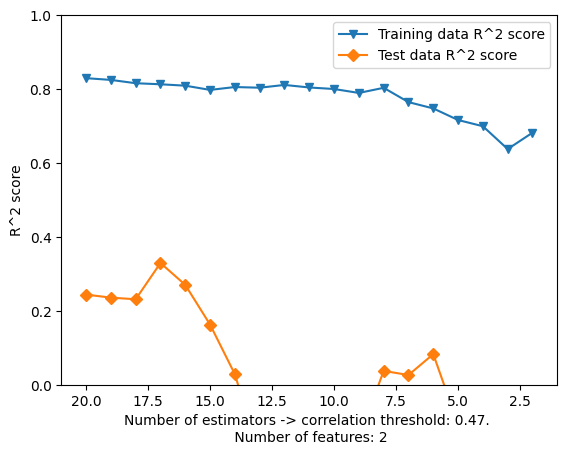

In [19]:
corre_list = [x / 100.0 for x in range(int(0.3*100), int(0.48*100), int(0.01*100))]
for element in corre_list:
    element_ = df_without_standarization[df_without_standarization['Correlation threshold'] == float(element)]
    plt.plot(element_['Number of estimators'], element_['Training data R^2 score'], label = "Training data R^2 score", marker='v')
    plt.plot(element_['Number of estimators'], element_['Test data R^2 score'], label = "Test data R^2 score", marker='D')
    plt.legend()
    plt.xlabel('Number of estimators -> correlation threshold: '+str(element)+'. \n Number of features: '+str(element_['Number of features'].iloc[0]))
    plt.xlim(max(element_['Number of estimators'])+1, min(element_['Number of estimators'])-1)
    plt.ylabel('R^2 score')
    plt.ylim([0, 1])
    plt.show()

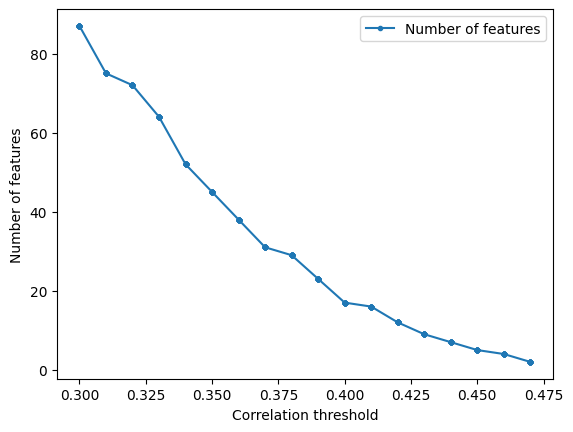

In [20]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

In [21]:
picked_ = float(input("Please input selected correlation threshold "))
element_ = df_without_standarization[df_without_standarization['Correlation threshold'] == picked_]
element_

Please input selected correlation threshold 0.46


,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,Number of estimators
304,0.46,0.756557,0.845212,4,2
305,0.46,0.799211,-1.050240,4,3
306,0.46,0.837000,0.868738,4,4
307,0.46,0.837160,0.890460,4,5
308,0.46,0.827401,0.862414,4,6
309,0.46,0.849219,0.731330,4,7
310,0.46,0.873156,0.696963,4,8
311,0.46,0.865701,0.572709,4,9
312,0.46,0.862456,0.547261,4,10
313,0.46,0.868821,0.457348,4,11


# sqrt(R^2)

In [22]:
r_a = df_without_standarization[df_without_standarization['Correlation threshold'] == picked_]

In [23]:
r_a['train R value'] = [np.sqrt(x) for x in r_a['Training data R^2 score']]

In [24]:
xcz = []
for element in r_a['Test data R^2 score']:
    x = np.sqrt(element)
    try:
        if x > 0:
            xcz.append(x)
        else:
            xcz.append(0)
    except:
        pass
    

In [25]:
xcz

[0.9193543294124193,
 0,
 0.9320612452604758,
 0.9436418653828202,
 0.928662310255302,
 0.8551781883690119,
 0.8348430753318634,
 0.7567753493981443,
 0.7397710618474836,
 0.67627538464875,
 0.7500629894676862,
 0.7791353455609531,
 0.7961700259071772,
 0.8175021580850222,
 0.8255260711893447,
 0.7659145660399757,
 0.7787405195912971,
 0.7630414356071917,
 0.7586917978669596]

In [26]:
r_a['test R value'] = xcz

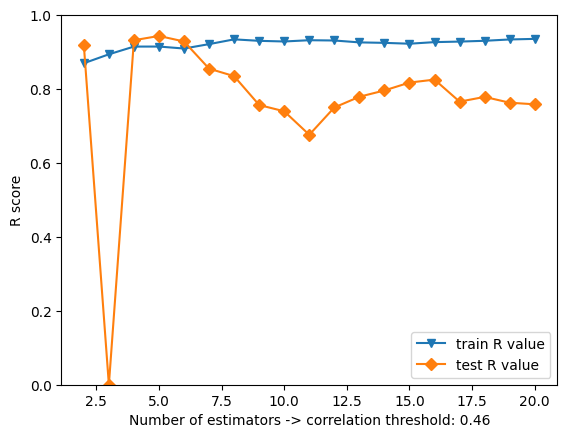

In [27]:
plt.plot(r_a['Number of estimators'], r_a['train R value'], label = "train R value", marker='v')
plt.plot(r_a['Number of estimators'], r_a['test R value'], label = "test R value", marker='D')
plt.legend()
plt.xlabel('Number of estimators -> correlation threshold: '+str(picked_))
plt.ylabel('R score')
plt.ylim([0, 1])
plt.show()

# Search inside correlation space - train test split

In [28]:
step = 0.01
initial_step = 0.3
last_step = 0.48
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
n_estimators = [range(2,21,1)]
corr_th = []
second_list = []
third_list = []
f_list = []
fif_list = []
for i in first_list:
    
    for estimator in n_estimators[0]:
        
        without_standarization, train_r2, test_r2, _, h_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df, 
                                                                                                    correlation_threshold=i, 
                                                                                                    standarization=False, 
                                                                                                    model_type='RandomForestRegressor',
                                                                                                    n_estimators_=estimator,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=False)
        corr_th.append(i)
        second_list.append(train_r2)
        third_list.append(test_r2)
        f_list.append(len(h_))
        fif_list.append(estimator)
        
df_without_standarization = pd.DataFrame(data=corr_th, columns=["Correlation threshold"])
df_without_standarization['Training data R^2 score'] = second_list
df_without_standarization['Test data R^2 score'] = third_list
df_without_standarization['Number of features'] = f_list
df_without_standarization['Number of estimators'] = fif_list
df_without_standarization.head()

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,Number of estimators
0,0.3,0.744184,-6.575615,87,2
1,0.3,0.747487,-4.341841,87,3
2,0.3,0.749154,-4.840526,87,4
3,0.3,0.805639,-16.484846,87,5
4,0.3,0.851298,-18.632338,87,6


## Plots

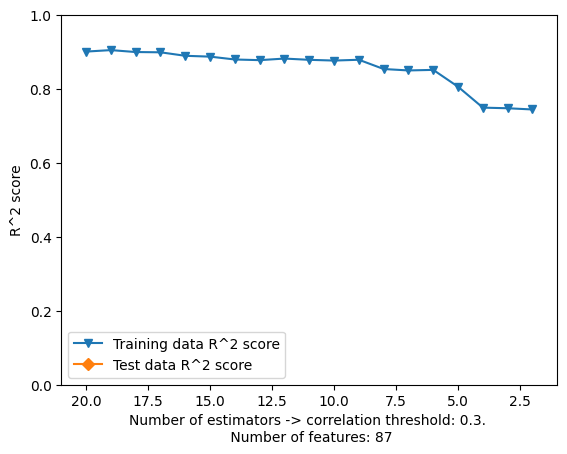

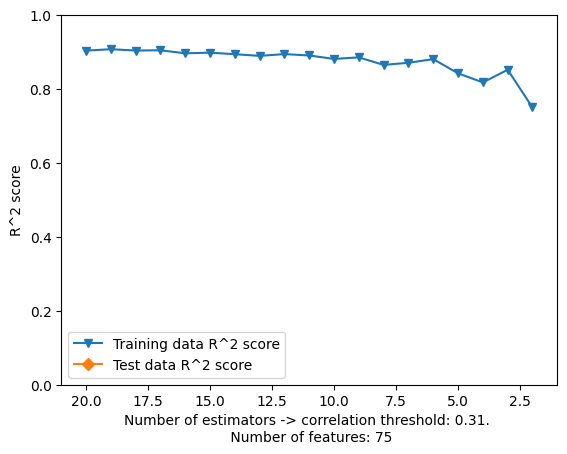

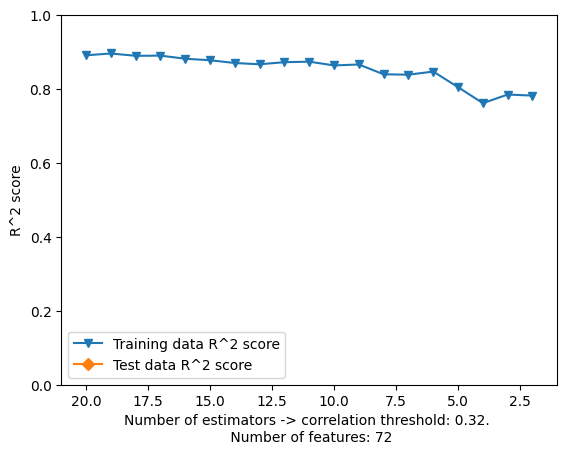

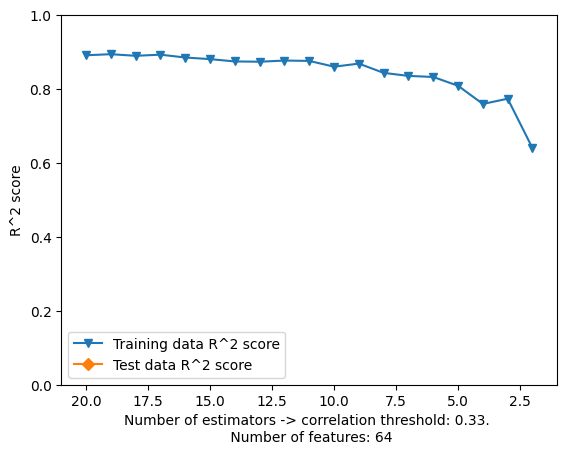

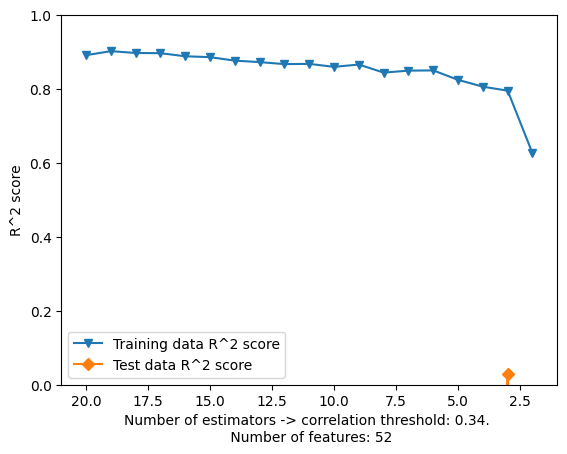

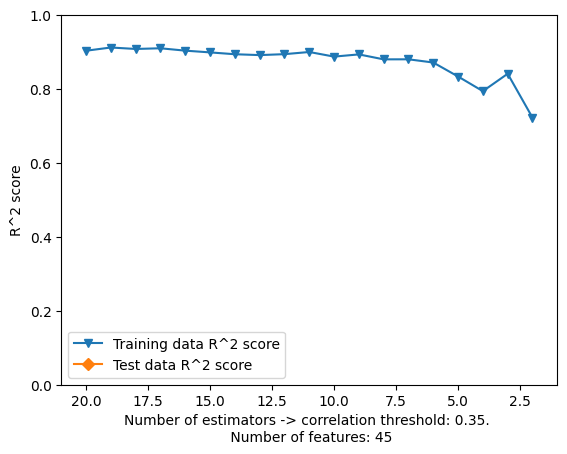

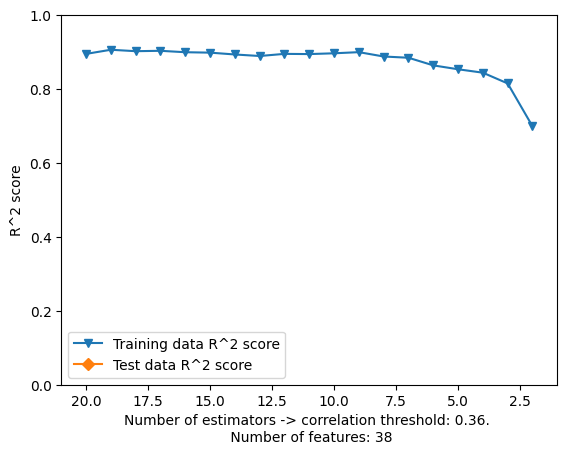

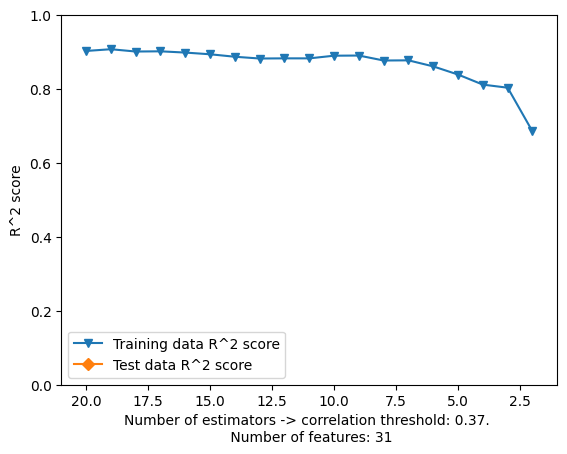

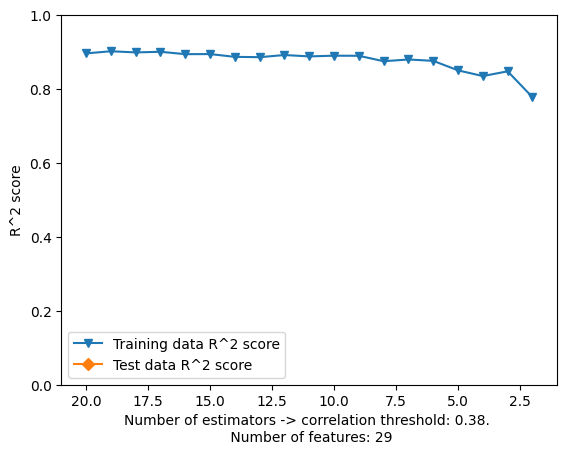

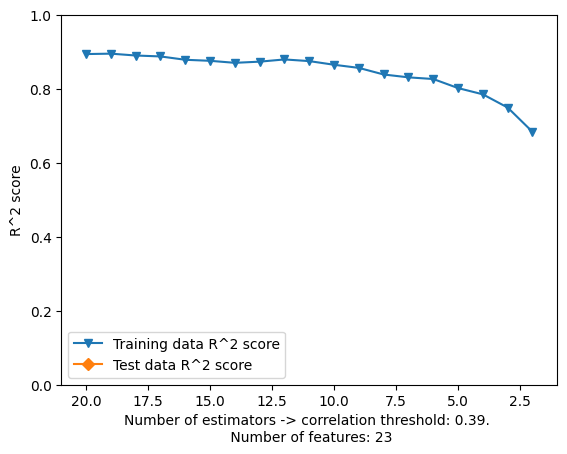

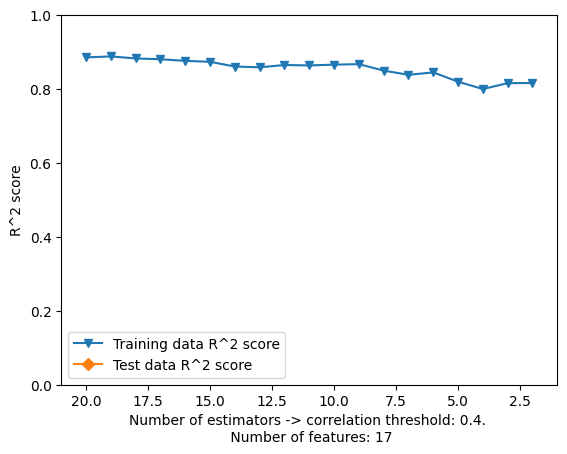

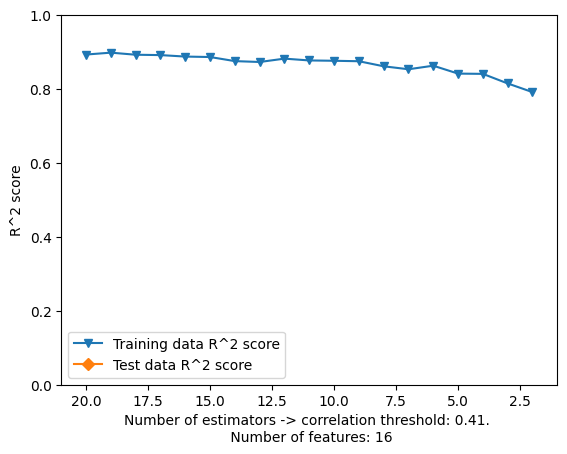

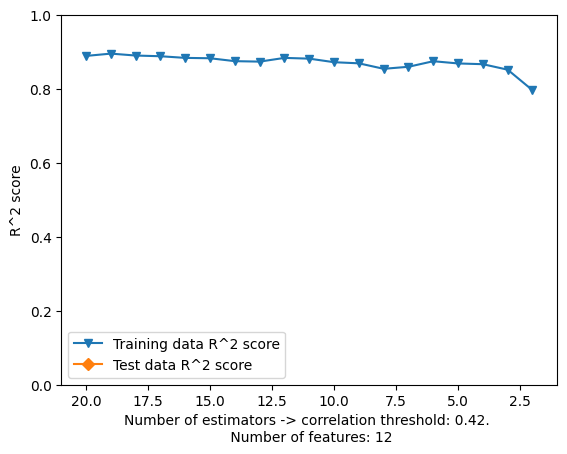

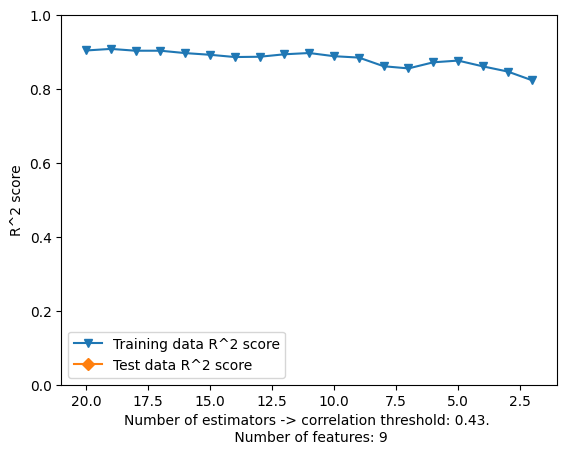

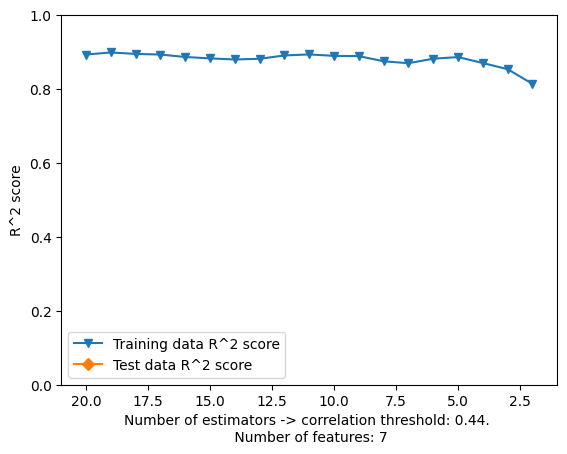

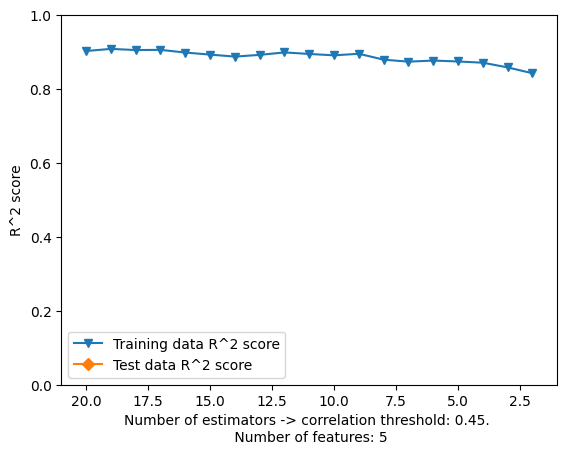

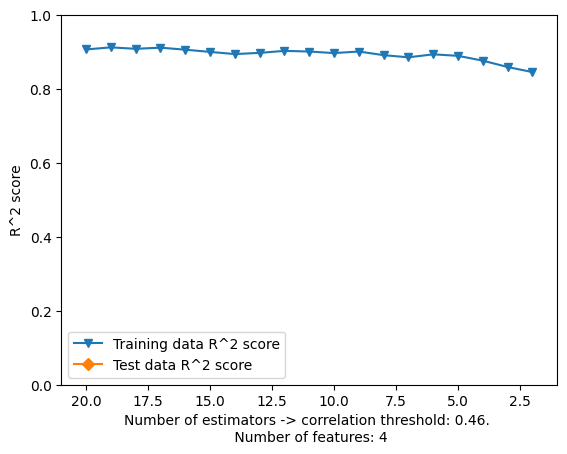

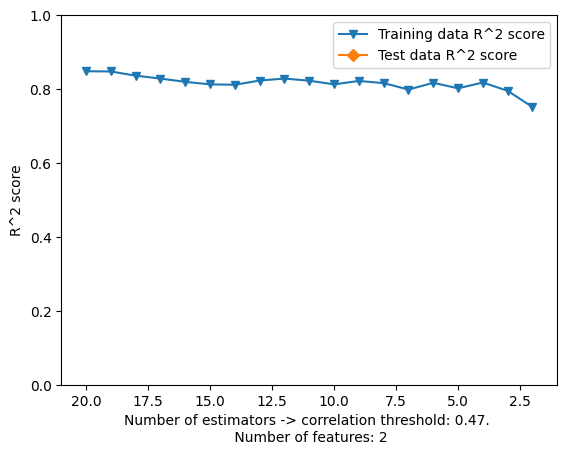

In [29]:
corre_list = [x / 100.0 for x in range(int(0.3*100), int(0.48*100), int(0.01*100))]
for element in corre_list:
    element_ = df_without_standarization[df_without_standarization['Correlation threshold'] == float(element)]
    plt.plot(element_['Number of estimators'], element_['Training data R^2 score'], label = "Training data R^2 score", marker='v')
    plt.plot(element_['Number of estimators'], element_['Test data R^2 score'], label = "Test data R^2 score", marker='D')
    plt.legend()
    plt.xlabel('Number of estimators -> correlation threshold: '+str(element)+'. \n Number of features: '+str(element_['Number of features'].iloc[0]))
    plt.xlim(max(element_['Number of estimators'])+1, min(element_['Number of estimators'])-1)
    plt.ylabel('R^2 score')
    plt.ylim([0, 1])
    plt.show()

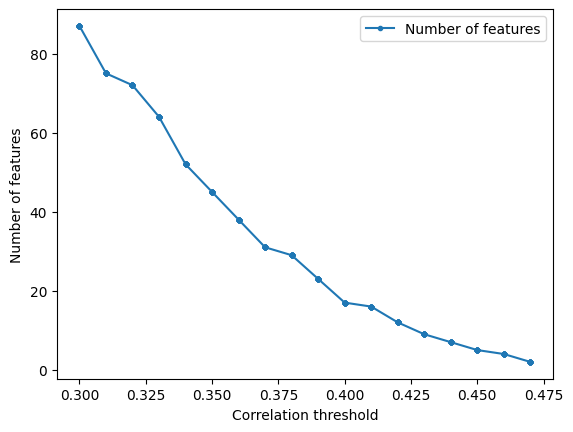

In [30]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

In [31]:
picked_ = float(input("Please input selected correlation threshold "))
element_ = df_without_standarization[df_without_standarization['Correlation threshold'] == picked_]
element_

Please input selected correlation threshold 0.46


,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,Number of estimators
304,0.46,0.845306,-3.266230,4,2
305,0.46,0.859050,-6.103221,4,3
306,0.46,0.876212,-4.042019,4,4
307,0.46,0.889309,-7.244467,4,5
308,0.46,0.893364,-5.419454,4,6
309,0.46,0.885312,-4.295592,4,7
310,0.46,0.891095,-5.889332,4,8
311,0.46,0.901004,-4.729967,4,9
312,0.46,0.896769,-6.978497,4,10
313,0.46,0.900940,-5.190120,4,11


## sqrt(R^2)

In [32]:
r_a = df_without_standarization[df_without_standarization['Correlation threshold'] == picked_]
r_a['train R value'] = [np.sqrt(x) for x in r_a['Training data R^2 score']]
xcz = []
for element in r_a['Test data R^2 score']:
    x = np.sqrt(element)
    try:
        if x > 0:
            xcz.append(x)
        else:
            xcz.append(0)
    except:
        pass
    
r_a['test R value'] = xcz

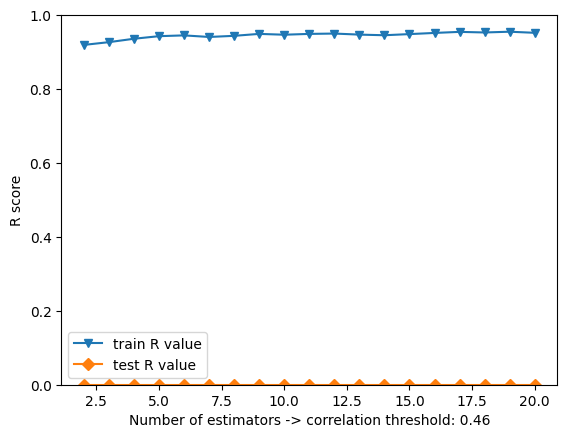

In [33]:
plt.plot(r_a['Number of estimators'], r_a['train R value'], label = "train R value", marker='v')
plt.plot(r_a['Number of estimators'], r_a['test R value'], label = "test R value", marker='D')
plt.legend()
plt.xlabel('Number of estimators -> correlation threshold: '+str(picked_))
plt.ylabel('R score')
plt.ylim([0, 1])
plt.show()

## Final model

In [32]:
final_model = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df, 
                                                                                                    correlation_threshold=0.46, 
                                                                                                    standarization=False, 
                                                                                                    model_type='RandomForestRegressor',
                                                                                                    n_estimators_=4,
                                                                                                    train_test_split_=False, 
                                                                                                    verbose=True)

I am not doing standarization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z    0.087615
1                  AATS0are    0.342320
2                    AATS0d    0.109619
3                   AATS0dv    0.266240
4                    AATS0i    0.017757
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z    0.087615                    0.087615
1                  AATS0are    0.342320                    0.342320
2                    AATS0d    0.109619                    0.109619
3                   AATS0dv    0.266240                    0.266240
4                    AATS0i    0.017757                    0.017757
          molecular descriptor name  corr_value  absolute correlation value
362                          ATSC4s   -0.482595                    0.482595

In [33]:
final_model[0].estimators_

[DecisionTreeRegressor(max_features='auto', random_state=1498160584),
 DecisionTreeRegressor(max_features='auto', random_state=1346817781),
 DecisionTreeRegressor(max_features='auto', random_state=768352140),
 DecisionTreeRegressor(max_features='auto', random_state=392366725)]

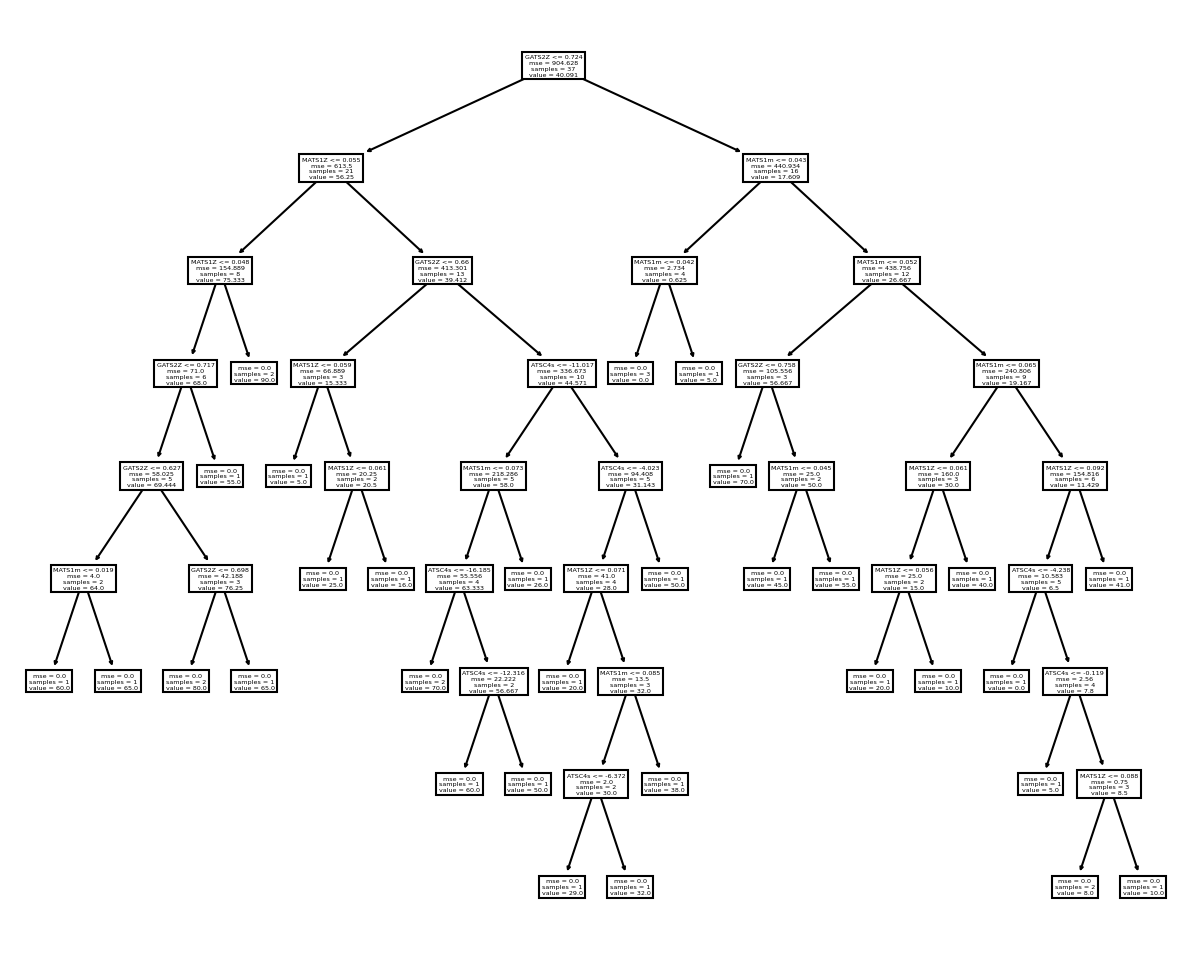

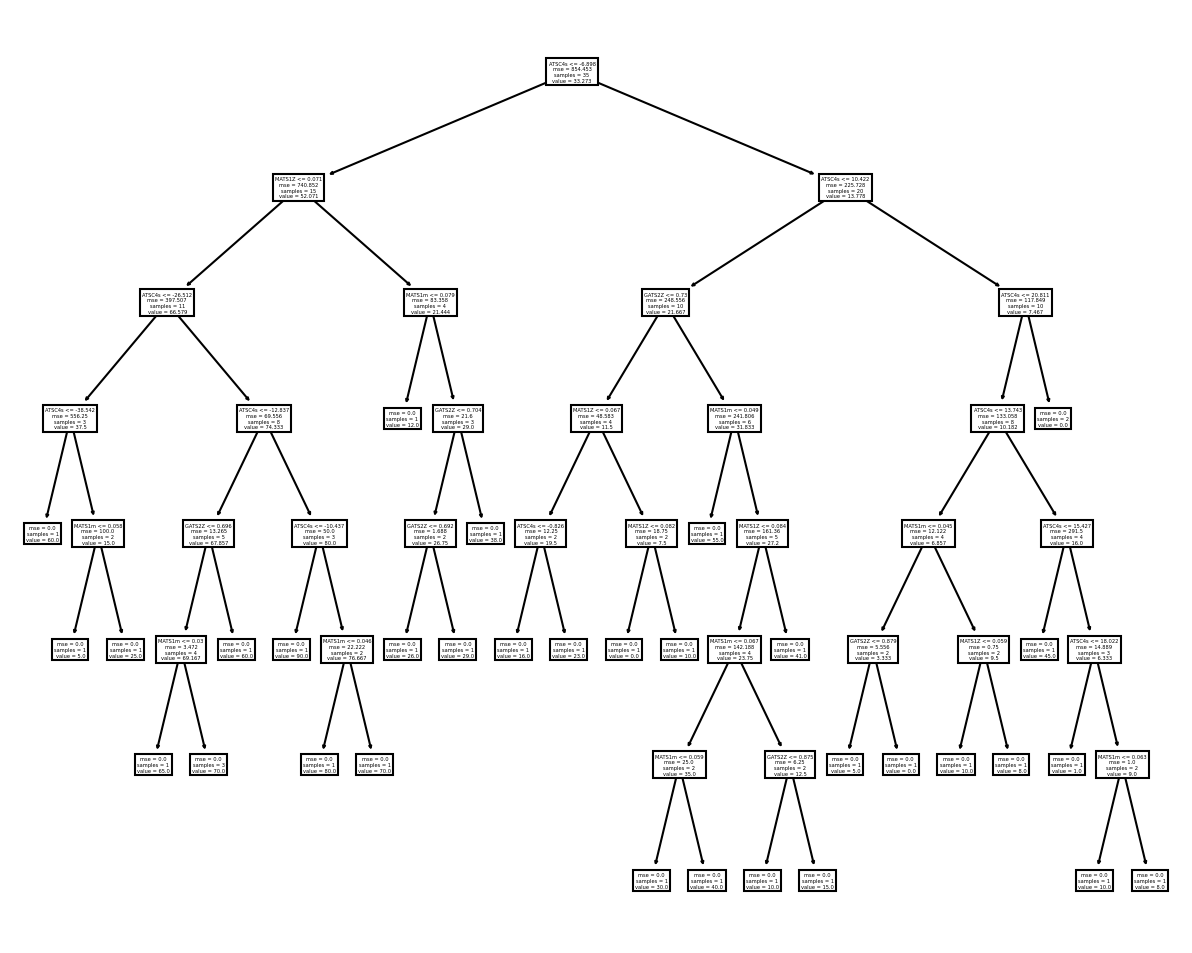

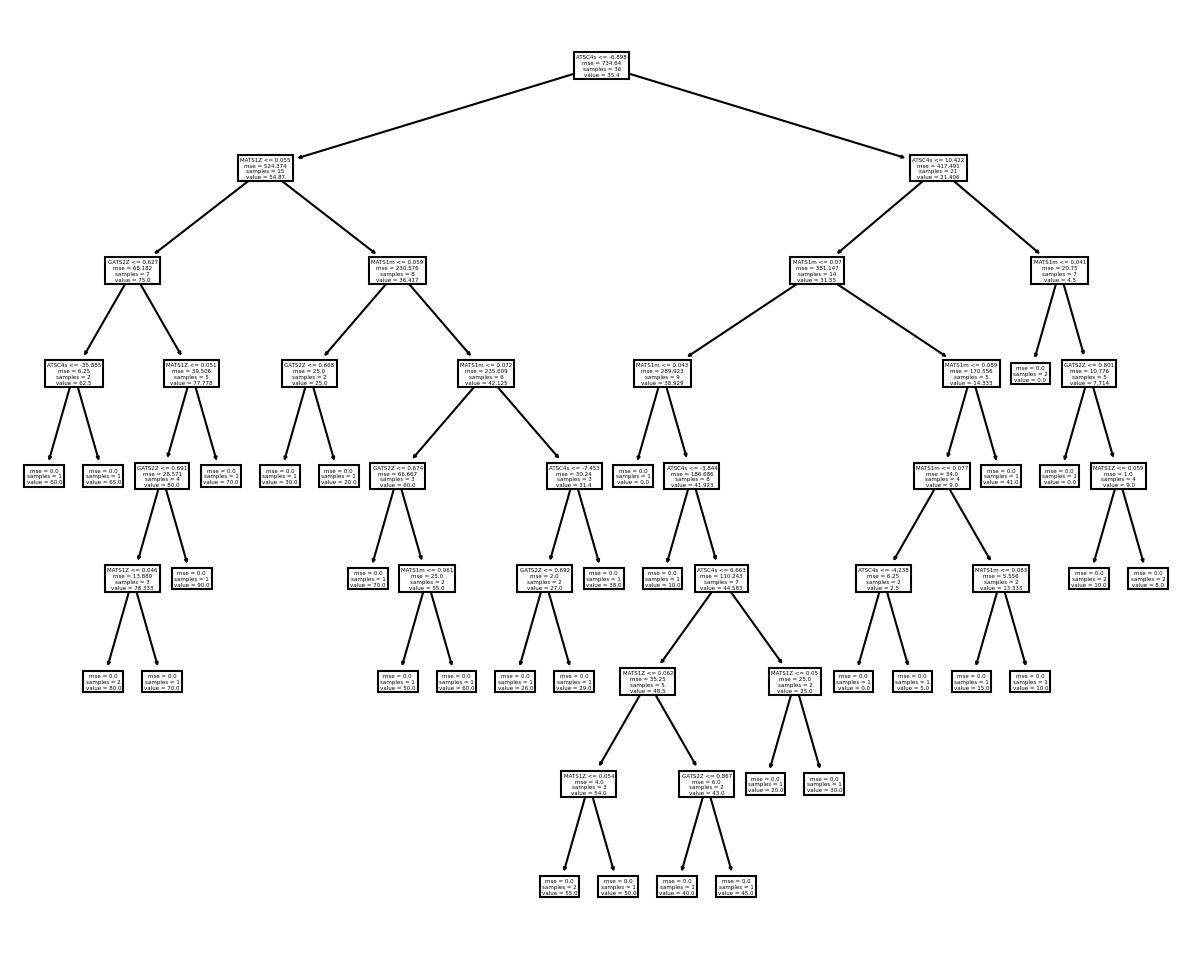

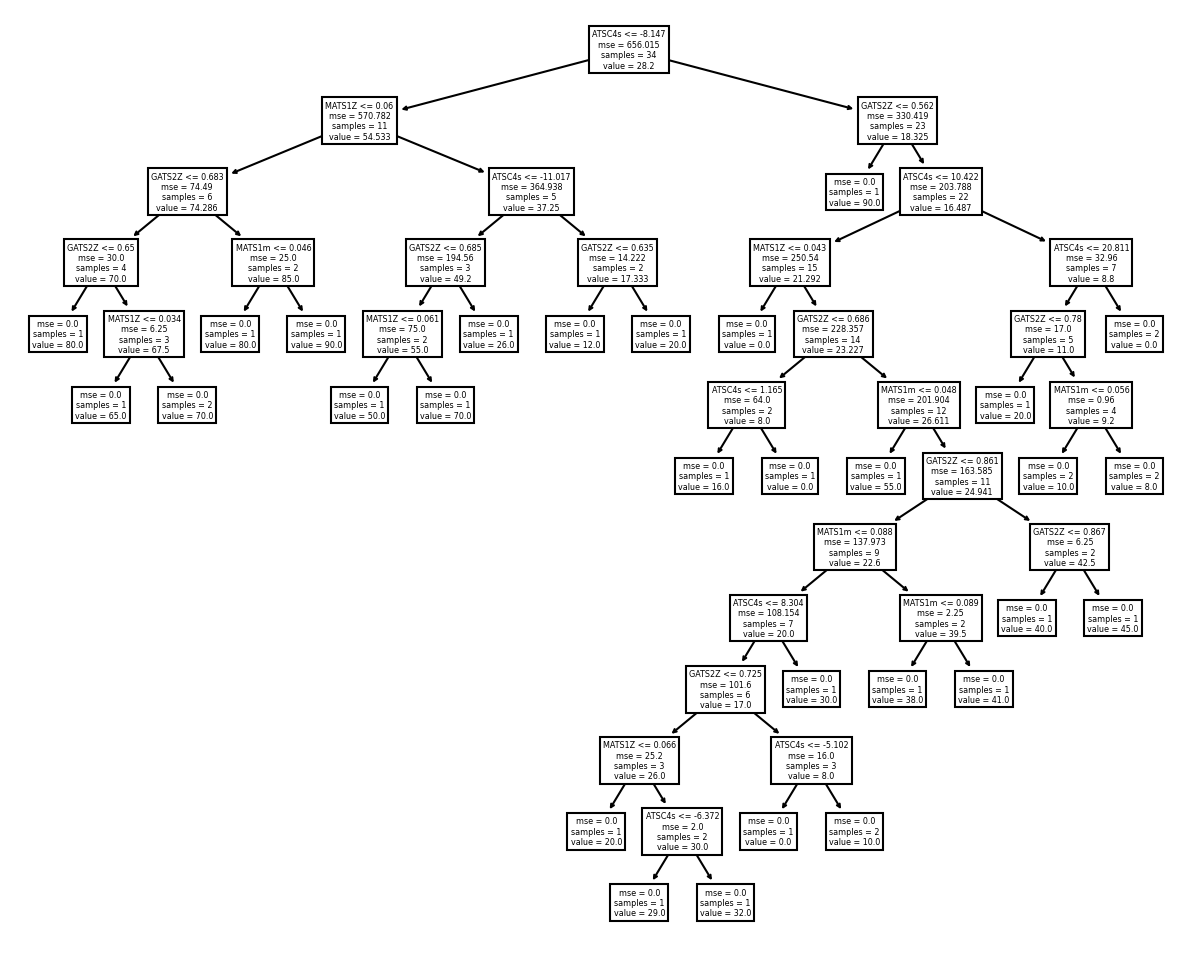

In [34]:
for x, decision_tree in enumerate(final_model[0].estimators_):
    plt.figure(figsize=(10,8), dpi=150)
    plot_tree(decision_tree, feature_names=list(final_model[4]['molecular descriptor name']))
    plt.savefig('Random_forest/random_forest'+str(x)+'.svg')

In [35]:
final_model[4]

,molecular descriptor name,corr_value,absolute correlation value
362,ATSC4s,-0.482595,0.482595
530,GATS2Z,-0.472027,0.472027
646,MATS1Z,-0.464299,0.464299
652,MATS1m,-0.462327,0.462327


In [36]:
# save
joblib.dump(final_model[0], "random_forest_model.joblib")
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("random_forest_model.joblib")

In [37]:
loaded_rf.predict(molecular_descriptors_df[final_model[4]['molecular descriptor name']])

array([16.5 , 42.75, 70.  , 18.75, 10.  ,  9.5 ,  8.  ,  2.  , 13.75,
       47.5 , 80.  , 45.25, 58.75, 55.  , 21.25, 60.  , 27.5 ,  0.  ,
        7.5 ,  2.5 ,  7.5 , 13.75, 10.  ,  0.  ,  7.5 , 14.5 ,  8.  ,
       30.  , 60.  , 37.5 , 42.5 , 67.5 , 51.5 , 46.25, 62.5 , 34.  ,
       52.5 , 90.  , 75.  , 65.  , 75.  , 72.5 , 73.75, 24.5 , 23.5 ,
       17.5 , 40.  , 27.  , 38.25, 27.5 , 12.5 , 26.  , 38.  , 41.  ,
       12.5 , 22.25, 22.25, 29.  ])

In [38]:
molecular_descriptors_df['Aktywność cytoprotekcyjna [%]']

0     12
1     45
2     65
3     15
4     10
5      0
6      8
7      0
8      0
9     90
10    80
11    55
12    75
13    55
14    10
15    50
16    45
17     0
18     5
19     0
20    10
21     0
22    10
23     0
24     5
25    10
26     8
27     5
28    70
29    20
30    25
31    70
32    60
33    30
34    70
35    50
36    70
37    90
38    70
39    60
40    80
41    65
42    65
43    16
44    23
45    10
46    40
47    45
48    20
49    30
50    20
51    26
52    38
53    41
54     1
55    25
56    32
57    29
Name: Aktywność cytoprotekcyjna [%], dtype: int64

In [39]:
xsz = r2_score(loaded_rf.predict(molecular_descriptors_df[final_model[4]['molecular descriptor name']]), molecular_descriptors_df['Aktywność cytoprotekcyjna [%]'])
xsz

0.7918549566061397

In [40]:
np.sqrt(xsz)

0.8898623245233723

## Predict target feature

In [41]:
to_prediction = pred_mode.prepare_data('../Data/Proposed_structures_with_AI_caffeine_tanimoto_similarity_.xlsx')

100%|████████████████████████████████████████████████████████████████████████████████| 346/346 [00:04<00:00, 71.74it/s]


Data size (rows, columns): (346, 1613)
Data size after first reduction (rows, columns): (346, 1375)
Data size after second reduction (rows, columns): (346, 1219)
There is issue with the target values...


In [42]:
predicted_activity = loaded_rf.predict(to_prediction[final_model[4]['molecular descriptor name']])

In [43]:
smiles = pd.read_excel('../Data/Proposed_structures_with_AI_caffeine_tanimoto_similarity_.xlsx')
smiles = smiles['new_SMILES']
smiles = smiles.to_list()
save_to_df = pd.DataFrame(data=smiles, columns=['SMILES'])

In [44]:
print(len(smiles))
print(len(predicted_activity))

346
346


In [45]:
save_to_df.head()

,SMILES
0,Cn1c(NCCCN=C2NC(=O)CS2)nc2c1n(C)c(=O)n2C
1,CN1CN=C(NCCCN=C2NC(=O)CS2)N(C)CN(C)C1=O
2,Cn1c(SC(=S)N2CCCC2)nc2c1n(C)c(=O)n2C=O
3,CN1Cc2c(n(C)c(=O)n(C)c2=O)C1NCC=CCCCN=N
4,CCN(C=O)C(=O)C=CN=C(NCCCN=C1NC(=O)CS1)N(C)C


In [46]:
save_to_df['Predicted activity'] = predicted_activity

In [47]:
save_to_df.head()

,SMILES,Predicted activity
0,Cn1c(NCCCN=C2NC(=O)CS2)nc2c1n(C)c(=O)n2C,16.75
1,CN1CN=C(NCCCN=C2NC(=O)CS2)N(C)CN(C)C1=O,16.75
2,Cn1c(SC(=S)N2CCCC2)nc2c1n(C)c(=O)n2C=O,45.00
3,CN1Cc2c(n(C)c(=O)n(C)c2=O)C1NCC=CCCCN=N,60.00
4,CCN(C=O)C(=O)C=CN=C(NCCCN=C1NC(=O)CS1)N(C)C,18.25


In [48]:
save_to_df.to_excel('../Data/Predicted_random_forest.xlsx')